In [1]:
import random
import torch
from d2l import torch as d2l
import os
os.environ ["KMP_DUPLICATE_LIB_OK"] ="TRUE"

In [2]:
def synthetic_data(w,b,num_examples):
    # 生成0，1的随机分布张量，大小为（(num_examples,len(w))）
    X = torch.normal(0,1,(num_examples,len(w)))
    #  torch.matmul矩阵相乘
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    # -1表示这一维的大小自行确定，y最后是一个列向量
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w, true_b, 1000)

print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 0.1088, -0.0102]) 
label: tensor([4.4519])


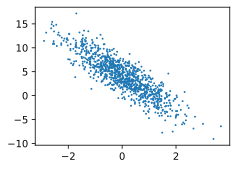

In [3]:
# 设置绘图尺寸
d2l.set_figsize()
# 创建散点图的函数调用 features的第二列、labels作为纵轴，点大小为1最小 
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

该函数接收批量的大小、特征矩阵、标签向量作为输入，生成大小为`batch_size`大小
的批量

In [4]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    # 生成一个list表
    indices = list(range(num_examples))
    # 打乱顺序 随机读取
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        # 截取一小部分的下标
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        # yield特殊的函数，每次执行到yield暂停执行返回数据 下次调用仍然执行
        yield features[batch_indices],labels[batch_indices]

batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,'\n',y)
    break

tensor([[-0.7600, -0.0346],
        [ 0.4859,  2.1077],
        [-0.8652,  0.0828],
        [ 0.9039, -0.3524],
        [ 1.2572, -0.1350],
        [ 0.8669,  0.2973],
        [ 1.6509,  0.4933],
        [-0.6444,  0.0184],
        [ 1.8159, -1.1169],
        [ 1.9293,  0.2608]]) 
 tensor([[ 2.7976],
        [-2.0018],
        [ 2.1928],
        [ 7.1934],
        [ 7.1644],
        [ 4.9027],
        [ 5.8156],
        [ 2.8577],
        [11.6376],
        [ 7.1745]])


定义初始化模型参数

In [5]:
w = torch.normal(0,0.01,size = (2,1),requires_grad = True)
b = torch.zeros(1, requires_grad = True)

定义模型

In [6]:
def linreg(X, w, b):
    # 线性回归模型
    return torch.matmul(X,w) + b

定义损失函数

In [7]:
def squared_loss(y_hat, y):
    # 均方损失误差
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

定义优化算法

In [8]:
def sgd(params, lr, batch_size):
    # 小批量随机梯度下降
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练

In [9]:
# 学习步长
lr = 0.03 
# 学习次数
num_epochs = 10
# 选取的网络
net = linreg
#  损失函数
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.043894
epoch 2, loss 0.000170
epoch 3, loss 0.000049
epoch 4, loss 0.000049
epoch 5, loss 0.000049
epoch 6, loss 0.000049
epoch 7, loss 0.000049
epoch 8, loss 0.000049
epoch 9, loss 0.000048
epoch 10, loss 0.000048


In [10]:
# f''单引号中间的值会用新值来进行替代  是一个格式化字符串的用法
print(f'w 的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b 的估计误差: {true_b - b}')

w 的估计误差: tensor([-6.6042e-05, -2.2745e-04], grad_fn=<SubBackward0>)
b 的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)


 这一节的PPT
![image-20230717154716965](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717154716965.png)

![image-20230717154737963](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717154737963.png)

![image-20230717155007924](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717155007924.png)

![image-20230717155041570](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717155041570.png)

![image-20230717155237360](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717155237360.png)

其中1/2是loss函数，1/n是求平均。最小化损失函数。

![image-20230717155345492](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717155345492.png)

## 优化方法

### 梯度下降

![image-20230717155700596](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717155700596.png)

![image-20230717155855839](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717155855839.png)

![image-20230717155959714](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717155959714.png)

![image-20230717160116618](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717160116618.png)

![image-20230717160203965](https://raw.githubusercontent.com/SisyphusTang/Picture-bed/master/image-20230717160203965.png)
